In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/2017_2018_initial_processed.csv")
df.head(10)

,CASE_STATUS,EMPLOYER_NAME,SOC_CODE,SOC_NAME,PREVAILING_WAGE,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE
0,CERTIFIED-WITHDRAWN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,15-2041,STATISTICIANS,58032.00,N,N,MA
1,CERTIFIED-WITHDRAWN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),25-1031,"ARCHITECTURE TEACHERS, POSTSECONDARY",60967.00,N,N,MA
2,CERTIFIED-WITHDRAWN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,19-2012,PHYSICISTS,50398.00,N,N,MA
3,CERTIFIED-WITHDRAWN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",61069.00,N,N,MA
4,CERTIFIED-WITHDRAWN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,17-2131,MATERIALS ENGINEERS,41392.00,N,N,MA
5,CERTIFIED-WITHDRAWN,"PARK VIEW TRAVEL BEVERLY HILLS, LLC",13-1121,"MEETING, CONVENTION, AND EVENT PLANNERS",45198.00,N,N,CA
6,WITHDRAWN,IBM INDIA PRIVATE LIMITED,15-1131,COMPUTER PROGRAMMERS,64979.00,N,N,IL
7,WITHDRAWN,IBM INDIA PRIVATE LIMITED,15-1131,COMPUTER PROGRAMMERS,72280.00,N,N,NJ
8,WITHDRAWN,BTREE SOLUTIONS INC,15-1121,COMPUTER SYSTEMS ANALYSTS,75442.00,Y,N,OH
9,WITHDRAWN,"YOUNIS ART STUDIO, INC,",27-1024,GRAPHIC DESIGNERS,8.24,N,N,MP


In [2]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

CASE_STATUS             0
EMPLOYER_NAME          69
SOC_CODE                0
SOC_NAME                1
PREVAILING_WAGE         3
H1B_DEPENDENT       24471
WILLFUL_VIOLATOR    24479
WORKSITE_STATE         16
dtype: int64

In [3]:
df = df.dropna(subset=['EMPLOYER_NAME'])
df = df.dropna(subset=['PREVAILING_WAGE'])
df = df.dropna(subset=['SOC_NAME'])
df = df.dropna(subset=['WORKSITE_STATE'])

Removing withdrawn from dataset, replace all cert-withdrawn with cert

In [4]:
df["CASE_STATUS"].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [5]:
df = df[df["CASE_STATUS"] != 'WITHDRAWN']

In [6]:
df["CASE_STATUS"].replace('CERTIFIED-WITHDRAWN', 'CERTIFIED', inplace=True)

In [7]:
temp1 = df["CASE_STATUS"].value_counts(ascending=True)
print(temp1)


DENIED         15608
CERTIFIED    1112422
Name: CASE_STATUS, dtype: int64


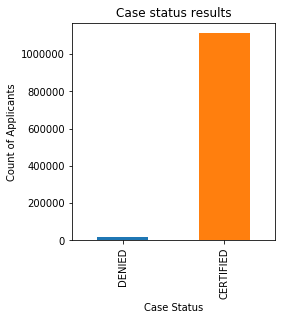

In [8]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Case Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Case status results")
temp1.plot(kind='bar')

In [9]:
temp1 = df["CASE_STATUS"].value_counts(normalize=True)
print(temp1)

CERTIFIED    0.986163
DENIED       0.013837
Name: CASE_STATUS, dtype: float64
